In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import log_loss
%matplotlib inline
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [29]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [46]:
def verify_win_probability(X_test, game_index, model):
    game = X_test.loc[game_index,]
    arg=(np.dot(game,model.coef_.T)) + model.intercept_
    win_prob = sigmoid(arg)[0]
    print("Win probability for game index", game_index, "= ",win_prob)

In [30]:
game_data = pd.read_csv('D1_2015_Combo_Stats.csv')
print("Number of records= ", game_data.shape[0])
game_data.head()


Number of records=  5149


,game_id,home_team,principal_team,opponent_team,game_result,game_date,principal_score,opponent_score,prn_pts_avg,prn_fg_pct,...,opp_off_rebs_avg,opp_ft_att_avg,opp_ft_pct,opp_turnover_avg,opp_win_pct,opp_allow_pts_avg,opp_allow_fg_pct,opp_allow_off_rebs_avg,opp_allow_ft_att_avg,opp_take_away_avg
0,00031772-cef1-44c2-a8db-1ccbef47690a,True,Utah Valley,Seattle,False,2016-01-29,62,73,69.611115,0.412221,...,7.833334,16.944445,0.652459,13.944445,0.352941,66.444440,0.430911,9.666667,17.500000,12.000000
1,000bc8c4-042e-4986-90c3-64e60bf1566d,True,Presbyterian,Coastal Carolina,False,2016-02-04,66,69,61.421050,0.429735,...,8.578947,18.947369,0.666667,12.157895,0.555556,64.526310,0.407795,8.368421,19.315790,9.473684
2,000f3eaa-c37e-4577-bbc3-5e07c4412a1e,False,South Alabama,Georgia State,False,2016-01-09,55,70,61.615383,0.393258,...,4.636363,18.545454,0.725490,11.000000,0.700000,56.454544,0.392233,7.636363,19.000000,11.454545
3,0012eab2-237c-4df1-846b-36430530867f,False,South Alabama,LSU,False,2015-11-20,66,78,35.000000,0.315068,...,8.000000,18.333334,0.636364,6.000000,1.000000,46.333332,0.380952,7.000000,13.666667,8.666667
4,0013581b-1b6f-4851-9bd5-4a6f91294537,False,Indiana State,Illinois State,False,2016-02-18,50,78,67.923080,0.408805,...,9.111111,17.962963,0.663918,11.814815,0.576923,64.333336,0.437048,7.629630,19.481482,13.259259


In [31]:
game_data = game_data[game_data['game_date'] > '2015-12-15']

encode_game_result = {"game_result": {False: "LOSS", True: "WIN"}}
game_data.replace(encode_game_result, inplace=True)
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 0 to 5148
Data columns (total 32 columns):
game_id                   3927 non-null object
home_team                 3927 non-null bool
principal_team            3927 non-null object
opponent_team             3927 non-null object
game_result               3927 non-null object
game_date                 3927 non-null object
principal_score           3927 non-null int64
opponent_score            3927 non-null int64
prn_pts_avg               3927 non-null float64
prn_fg_pct                3927 non-null float64
prn_off_rebs_avg          3927 non-null float64
prn_ft_att_avg            3927 non-null float64
prn_ft_pct                3927 non-null float64
prn_turnover_avg          3927 non-null float64
prn_win_pct               3927 non-null float64
prn_allow_pts_avg         3927 non-null float64
prn_allow_fg_pct          3927 non-null float64
prn_allow_off_rebs_avg    3927 non-null float64
prn_allow_ft_att_avg      3927 non-null f

In [32]:
game_data['delta_pts_avg'] = game_data['prn_pts_avg'] - game_data['opp_pts_avg'] 
game_data['delta_fg_pct'] = game_data['prn_fg_pct'] - game_data['opp_fg_pct'] 
game_data['delta_off_rebs_avg'] = game_data['prn_off_rebs_avg'] - game_data['opp_off_rebs_avg'] 
game_data['delta_ft_att_avg'] = game_data['prn_ft_att_avg'] - game_data['opp_off_rebs_avg'] 
game_data['delta_ft_pct'] = game_data['prn_ft_pct'] - game_data['opp_ft_pct'] 
game_data['delta_turnover_avg'] = game_data['prn_turnover_avg'] - game_data['opp_turnover_avg'] 
game_data['delta_win_pct'] = game_data['prn_win_pct'] - game_data['opp_win_pct'] 
game_data['delta_allow_pts_avg'] = game_data['prn_allow_pts_avg'] - game_data['opp_allow_pts_avg'] 
game_data['delta_allow_fg_pct'] = game_data['prn_allow_fg_pct'] - game_data['opp_allow_fg_pct'] 
game_data['delta_allow_off_rebs_avg'] = game_data['prn_allow_off_rebs_avg'] - game_data['opp_allow_off_rebs_avg'] 
game_data['delta_allow_ft_att_avg'] = game_data['prn_allow_ft_att_avg'] - game_data['opp_allow_ft_att_avg'] 
game_data['delta_take_away_avg'] = game_data['prn_take_away_avg'] - game_data['opp_take_away_avg'] 

numeric_feature_to_scale = ['delta_pts_avg', 'delta_off_rebs_avg', 'delta_ft_att_avg', 'delta_turnover_avg',
                           'delta_allow_pts_avg','delta_allow_off_rebs_avg', 'delta_allow_ft_att_avg', 
                            'delta_take_away_avg']

game_data_scale = game_data[numeric_feature_to_scale].copy()
scaler =StandardScaler()
scaled_features = scaler.fit_transform(game_data_scale.values)
scaled_df = pd.DataFrame(scaled_features, index=game_data_scale.index, columns=game_data_scale.columns)

# Add the categorical columns and previously scaled numerics 
scaled_df['home_team'] = game_data['home_team']
scaled_df['delta_fg_pct'] = game_data['delta_fg_pct']
scaled_df['delta_ft_pct'] = game_data['delta_ft_pct']
scaled_df['delta_win_pct'] = game_data['delta_win_pct']
scaled_df['delta_allow_fg_pct'] = game_data['delta_allow_fg_pct']
scaled_df['delta_fg_pct'] = game_data['delta_fg_pct']
scaled_df['delta_ft_pct'] = game_data['delta_ft_pct']
scaled_df['delta_win_pct'] = game_data['delta_win_pct']
scaled_df['delta_allow_fg_pct'] = game_data['delta_allow_fg_pct']


scaled_df.head()

,delta_pts_avg,delta_off_rebs_avg,delta_ft_att_avg,delta_turnover_avg,delta_allow_pts_avg,delta_allow_off_rebs_avg,delta_allow_ft_att_avg,delta_take_away_avg,home_team,delta_fg_pct,delta_ft_pct,delta_win_pct,delta_allow_fg_pct
0,1.083599,-0.290165,0.012099,-0.574034,1.260320,0.037873,1.241927,-0.126628,True,-0.014648,0.093206,0.000000,0.018163
1,-0.782094,-0.907596,-0.720658,0.859351,0.636477,0.128102,0.348359,1.772082,True,-0.021941,0.036036,-0.277778,0.045129
2,0.310032,2.499072,1.458965,1.255849,1.511226,0.038099,0.563841,0.040065,False,-0.065327,-0.127704,-0.366667,0.048055
4,0.425462,-0.402489,0.750865,0.498629,0.392551,0.086807,1.404596,-0.561232,False,-0.002099,0.037925,-0.096923,-0.016831
6,-1.159105,-1.019387,0.554584,0.908697,-1.416092,-0.275191,0.646732,-0.438900,True,-0.000092,0.005890,0.082051,-0.050451


In [33]:
X = scaled_df
y= game_data['game_result'].copy()
y = pd.get_dummies(y, columns=['game_result'], drop_first=True)
y=y.WIN
X = pd.get_dummies(X, columns=['home_team'], drop_first=True)
print(X.shape)
X.head()

(3927, 13)


,delta_pts_avg,delta_off_rebs_avg,delta_ft_att_avg,delta_turnover_avg,delta_allow_pts_avg,delta_allow_off_rebs_avg,delta_allow_ft_att_avg,delta_take_away_avg,delta_fg_pct,delta_ft_pct,delta_win_pct,delta_allow_fg_pct,home_team_True
0,1.083599,-0.290165,0.012099,-0.574034,1.260320,0.037873,1.241927,-0.126628,-0.014648,0.093206,0.000000,0.018163,1
1,-0.782094,-0.907596,-0.720658,0.859351,0.636477,0.128102,0.348359,1.772082,-0.021941,0.036036,-0.277778,0.045129,1
2,0.310032,2.499072,1.458965,1.255849,1.511226,0.038099,0.563841,0.040065,-0.065327,-0.127704,-0.366667,0.048055,0
4,0.425462,-0.402489,0.750865,0.498629,0.392551,0.086807,1.404596,-0.561232,-0.002099,0.037925,-0.096923,-0.016831,0
6,-1.159105,-1.019387,0.554584,0.908697,-1.416092,-0.275191,0.646732,-0.438900,-0.000092,0.005890,0.082051,-0.050451,1


In [34]:
print(y.shape)

(3927,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(3141, 13)
(3141,)
(786, 13)
(786,)


,delta_pts_avg,delta_off_rebs_avg,delta_ft_att_avg,delta_turnover_avg,delta_allow_pts_avg,delta_allow_off_rebs_avg,delta_allow_ft_att_avg,delta_take_away_avg,delta_fg_pct,delta_ft_pct,delta_win_pct,delta_allow_fg_pct,home_team_True
606,0.286994,-0.217267,-0.475677,1.030733,-0.613532,0.577172,-0.109431,0.044684,0.035301,-0.032476,0.217672,-0.056754,1
4280,-0.400194,-1.858253,-1.361110,-0.092377,0.832769,0.204877,0.737947,0.417171,0.039681,-0.009991,-0.332016,0.023945,0
3770,-1.043851,-0.685512,-0.721103,-0.808782,-0.112618,-0.489748,0.536465,-0.964231,-0.001117,-0.083764,-0.171429,0.009879,0
1938,-1.599624,0.226145,-1.197373,0.683865,-0.500562,-1.275382,-1.037938,-2.889060,-0.037788,-0.142492,-0.321429,-0.017538,1
1250,-0.983683,-1.605417,-0.704863,1.295708,-1.753606,-1.242112,-1.064481,0.264742,0.032768,-0.037915,0.200000,-0.042315,1


In [36]:
logreg = LogisticRegression()

result = logreg.fit(X_train,y_train)

print("Coeffs ",logreg.coef_)
print("Intercept ", logreg.intercept_)

Coeffs  [[ 0.84168006  0.12717344 -0.09923794 -0.09280286 -0.7411147  -0.13795523
  -0.07735919  0.06379756  0.58177255 -0.04443277  0.22269454  0.07381833
   1.19312987]]
Intercept  [-0.66270243]


In [37]:
y_pred = logreg.predict(X_test)
print("LR model accuracy is %2.2f" % metrics.accuracy_score(y_test, y_pred))

LR model accuracy is 0.72


In [38]:
prediction_probabilities = logreg.predict_proba(X_test)
prediction_probabilities[:,1]
pred_probs = pd.Series(prediction_probabilities[:,1], index=X_test.index)
predictions = pd.Series(y_pred, index=y_test.index)
print(y_pred.shape)

(786,)


In [39]:
# Retrieve the non-normalized game stats
test_games = game_data[game_data.index.isin(X_test.index)].copy()
test_games.shape

test_games['predicted_result'] = predictions
test_games['pred_win_prob'] = pred_probs

encode_pred_result = {"predicted_result": {0: "LOSS", 1: "WIN"}}
test_games.replace(encode_pred_result, inplace=True)

test_games.head()

,game_id,home_team,principal_team,opponent_team,game_result,game_date,principal_score,opponent_score,prn_pts_avg,prn_fg_pct,...,delta_ft_pct,delta_turnover_avg,delta_win_pct,delta_allow_pts_avg,delta_allow_fg_pct,delta_allow_off_rebs_avg,delta_allow_ft_att_avg,delta_take_away_avg,predicted_result,pred_win_prob
1,000bc8c4-042e-4986-90c3-64e60bf1566d,True,Presbyterian,Coastal Carolina,LOSS,2016-02-04,66,69,61.42105,0.429735,...,0.036036,1.578947,-0.277778,4.789480,0.045129,0.210526,1.368420,3.842105,LOSS,0.325707
17,00be2316-61e0-4451-8ad6-f867e77b1ee1,False,Sam Houston State,Stephen F. Austin,LOSS,2016-01-24,64,76,65.68750,0.400447,...,-0.041458,-0.598214,-0.148718,3.562500,-0.032252,-0.285714,4.232143,-4.214286,LOSS,0.142897
27,0149515a-045f-4c64-8223-e86ad86b6912,False,Memphis,Connecticut,LOSS,2016-03-13,58,72,74.85294,0.413927,...,-0.060620,1.500000,-0.121212,6.794115,0.016842,1.441177,3.441176,2.000000,LOSS,0.224763
28,01565384-ecae-4cca-8b94-ecbf471a2973,True,Loyola (IL),Cleveland State,LOSS,2015-12-17,54,60,57.11111,0.427918,...,0.055555,0.555556,0.375000,-2.222223,-0.042127,-0.777778,-6.555554,-0.111111,WIN,0.825926
36,01ece451-d68c-4918-b704-a87c0a201134,False,Wichita State,Bradley,WIN,2016-01-03,85,58,64.75000,0.401562,...,0.052197,-5.714286,0.468531,-8.059528,-0.003838,-4.583334,-4.238094,4.702381,WIN,0.933633


Text(0.5,1,'Probabilities For Missed Predictions')

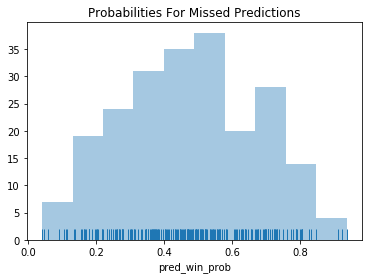

In [40]:
missed_predictions = test_games[test_games['game_result'] != 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

missed_predictions.pred_win_prob

sns.distplot(missed_predictions.pred_win_prob, kde=False, rug=True).set_title("Probabilities For Missed Predictions")

Text(0.5,1,'Probabilities For Correct Predictions')

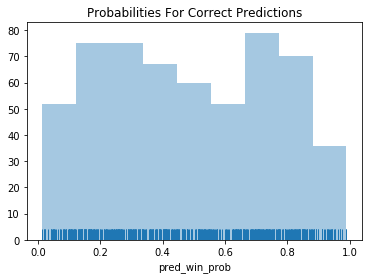

In [41]:
correct_predictions = test_games[test_games['game_result'] == 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

sns.distplot(correct_predictions.pred_win_prob, kde=False, rug=True).set_title("Probabilities For Correct Predictions")

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[293,  96],
       [124, 273]], dtype=int64)

Text(0.5,257.44,'Predicted label')

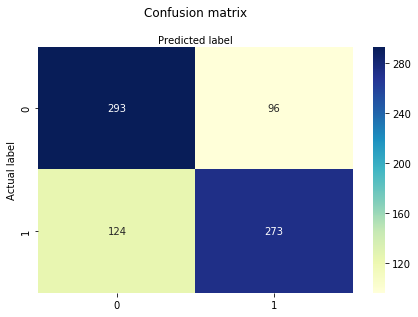

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7201017811704835
Precision: 0.7398373983739838
Recall: 0.6876574307304786


In [45]:
print("\n\n---Logistic Model---")
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
print("Base Rate AUC= %2.2f" % logit_roc_auc)
print(metrics.classification_report(y_test, y_pred))



---Logistic Model---
Base Rate AUC= 0.72
             precision    recall  f1-score   support

          0       0.70      0.75      0.73       389
          1       0.74      0.69      0.71       397

avg / total       0.72      0.72      0.72       786



In [47]:
verify_win_probability(X_test, 1, logreg)

Win probability for game index 1 =  0.325707409329535


In [49]:
log_loss(y_test, prediction_probabilities)

0.5596016144373579